In [1]:
%config Completer.use_jedi = False

In [2]:
# Import libraries and load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
spotify = pd.read_csv('spotify.csv')
df = spotify.copy()

In [3]:
df.tail(10)

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
170643,0.9070,2020,0.00952,"['DJ Scheme', 'Cordae', 'Ski Mask The Slump Go...",0.917,228333,0.56900,1,3C9D1X8NkG2Ak1RaGpRnnQ,0.000000,7,0.0774,-10.456,1,Soda (feat. Take A Daytrip),66,2020-11-13,0.2790,144.014
170644,0.4660,2020,0.31000,['Fleet Foxes'],0.562,253613,0.68600,0,308prODCCD0O660tIktbUi,0.022500,7,0.1250,-8.480,1,Sunblind,66,2020-09-22,0.0249,103.054
170645,0.1690,2020,0.99400,['Ólafur Arnalds'],0.281,190500,0.03330,0,13MOQ6oQqkrZEDkZOHukCw,0.959000,6,0.0995,-31.460,1,We Contain Multitudes (from home),70,2020-08-26,0.0348,90.250
170646,0.5220,2020,0.20400,['Gunna'],0.598,230600,0.47200,1,2f8y4CuG57UJEmkG3ujd0D,0.000015,0,0.1080,-10.991,1,NASTY GIRL / ON CAMERA,66,2020-05-22,0.2580,120.080
170647,0.0838,2020,0.97400,['Najma Wallin'],0.175,133500,0.00759,0,6RuFOroO9VO0aMGEzirLHk,0.925000,7,0.1130,-35.072,1,Med slutna ögon,70,2020-02-21,0.0454,70.872
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.80800,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.75300,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.85800,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.62300,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055
170652,0.6420,2020,0.13200,"['KEVVO', 'J Balvin']",0.856,189507,0.72100,1,7HmnJHfs0BkFzX4x8j0hkl,0.004710,7,0.1820,-4.928,1,Billetes Azules (with J Balvin),74,2020-10-16,0.1080,94.991


In [4]:
# How many unique values and nullvalues each column?
column = []
for column_item in df.columns:
    column.append(column_item)

nunique = []
for nunique_item in df.columns:
    nunique.append(df[nunique_item].nunique())
    
isnull = []
isnull_percent = []
for null_item in df.columns:
    isnull.append(df[null_item].isnull().sum())
    isnull_percent.append((df[null_item].isnull().sum()/len(df[null_item]))*100)
    
pd.DataFrame({'Column': column, 'Total Unique': nunique, 'Null Value': isnull, 'Null Value (%)': isnull_percent})

,Column,Total Unique,Null Value,Null Value (%)
0,valence,1733,0,0.0
1,year,100,0,0.0
2,acousticness,4689,0,0.0
3,artists,34088,0,0.0
4,danceability,1240,0,0.0
5,duration_ms,51755,0,0.0
6,energy,2332,0,0.0
7,explicit,2,0,0.0
8,id,170653,0,0.0
9,instrumentalness,5401,0,0.0


In [5]:
x = df.groupby(['year']).count()[['release_date']]

In [6]:
x.reset_index()

,year,release_date
0,1921,150
1,1922,71
2,1923,185
3,1924,236
4,1925,278
...,...,...
95,2016,1797
96,2017,1992
97,2018,2103
98,2019,1949


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
df.describe().round(3)

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000,170653.000
mean,0.529,1976.787,0.502,0.537,230948.311,0.482,0.085,0.167,5.200,0.206,-11.468,0.707,31.432,0.098,116.862
std,0.263,25.918,0.376,0.176,126118.415,0.268,0.278,0.313,3.515,0.175,5.698,0.455,21.827,0.163,30.709
min,0.000,1921.000,0.000,0.000,5108.000,0.000,0.000,0.000,0.000,0.000,-60.000,0.000,0.000,0.000,0.000
25%,0.317,1956.000,0.102,0.415,169827.000,0.255,0.000,0.000,2.000,0.099,-14.615,0.000,11.000,0.035,93.421
50%,0.540,1977.000,0.516,0.548,207467.000,0.471,0.000,0.000,5.000,0.136,-10.580,1.000,33.000,0.045,114.729
75%,0.747,1999.000,0.893,0.668,262400.000,0.703,0.000,0.102,8.000,0.261,-7.183,1.000,48.000,0.076,135.537
max,1.000,2020.000,0.996,0.988,5403500.000,1.000,1.000,1.000,11.000,1.000,3.855,1.000,100.000,0.970,243.507


In [9]:
# Data Visualization

<AxesSubplot:>

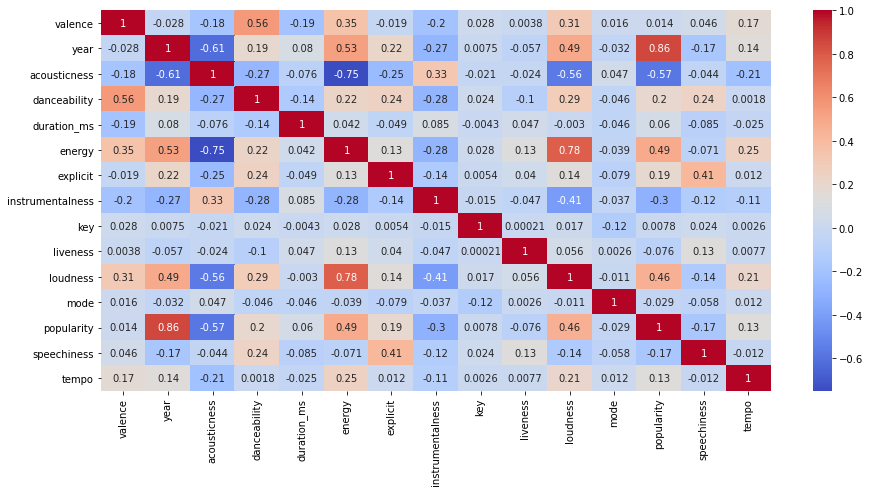

In [10]:
plt.figure(figsize=(15,7)) # Create canvas
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

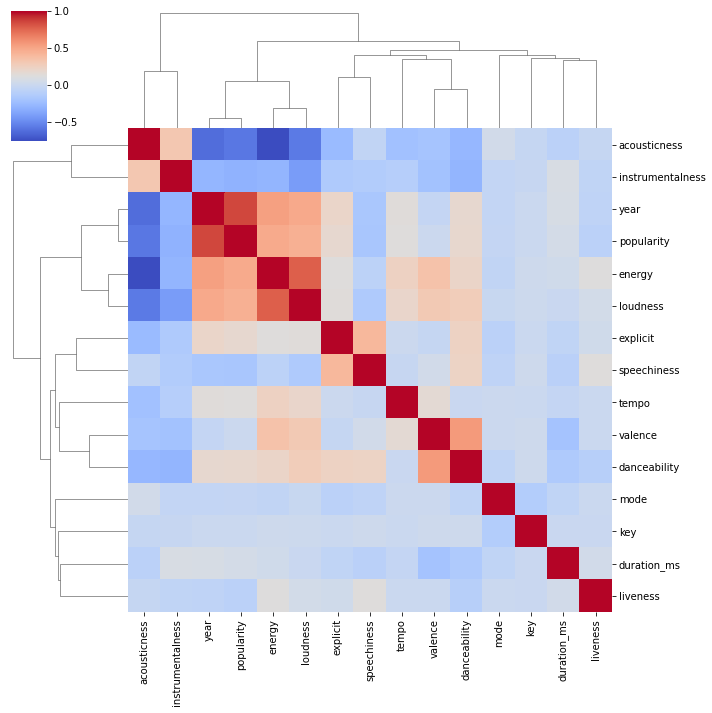

In [11]:
sns.clustermap(df.corr(),cmap="coolwarm")

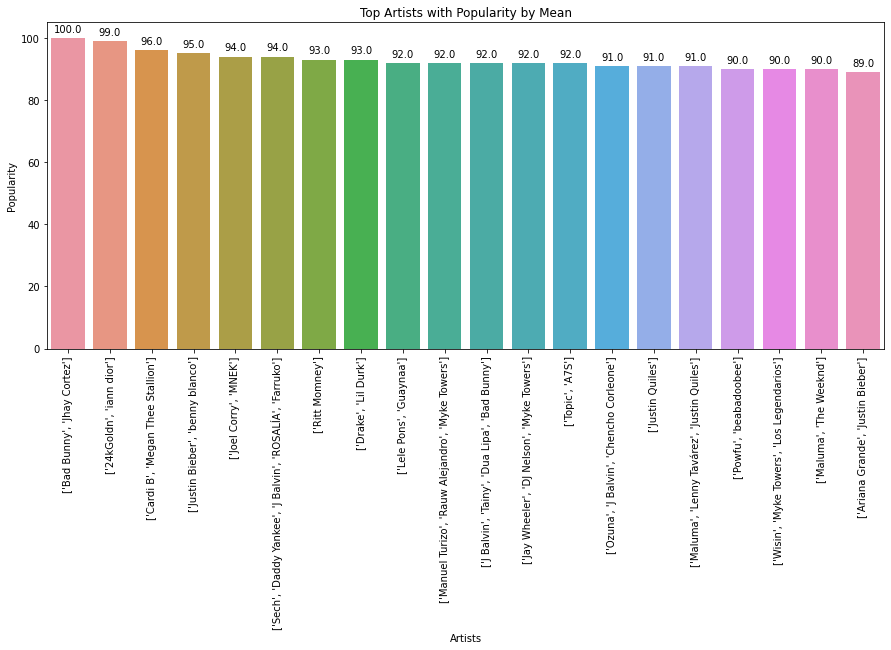

In [12]:
plt.figure(figsize=(15, 6))
x = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x);
for ax_value in ax.patches:
    ax.annotate(format(ax_value.get_height(), '.1f'), 
                   (ax_value.get_x() + ax_value.get_width() / 2., ax_value.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

ax.set_title('Top Artists with Popularity by Mean')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90);

The most popular artists by average popularity are Bad Bunny and Jhay Cortez 

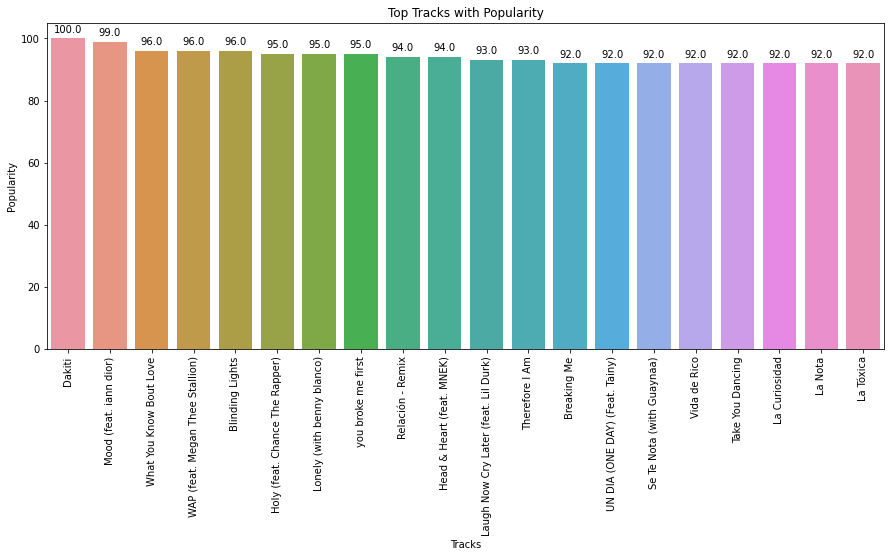

In [13]:
plt.figure(figsize=(15,6))
y= df.groupby('name')['popularity'].mean().sort_values(ascending=False).head(20)
ay = sns.barplot(y.index, y);
for ay_value in ay.patches:
    ay.annotate(format(ay_value.get_height(), '.1f'), 
                   (ay_value.get_x() + ay_value.get_width() / 2., ay_value.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
ay.set_xlabel('Tracks');
ay.set_ylabel('Popularity');
ay.set_title('Top Tracks with Popularity');
plt.xticks(rotation=90);

The most popular name by average popularity is Dakiti

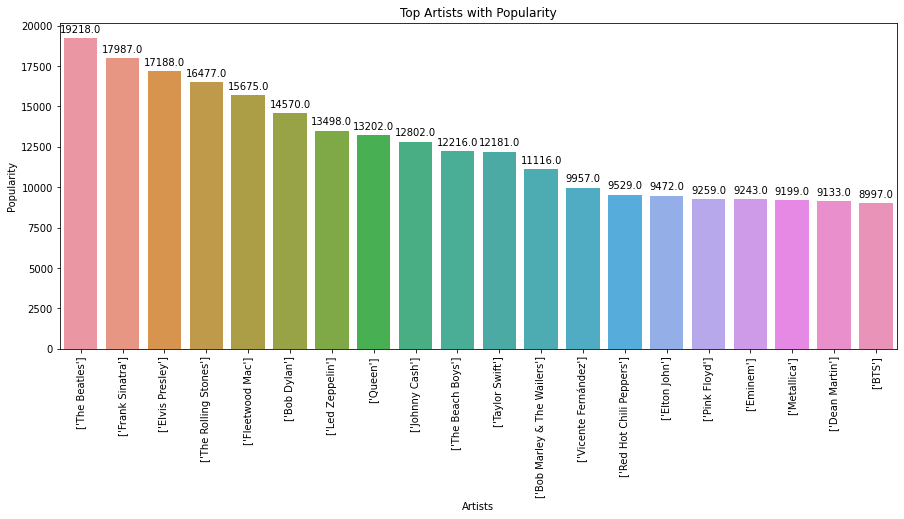

In [14]:
plt.figure(figsize=(15,6))
artists_popular = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
aa = sns.barplot(artists_popular.index, artists_popular)
for aa_value in aa.patches:
    aa.annotate(format(aa_value.get_height(), '.1f'), 
                   (aa_value.get_x() + aa_value.get_width() / 2., aa_value.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
aa.set_xlabel('Artists')
aa.set_ylabel('Popularity')
aa.set_title('Top Artists with Popularity')
plt.xticks(rotation=90);

The most popular artists by sum popularity is The Beatles

# Time Analysis

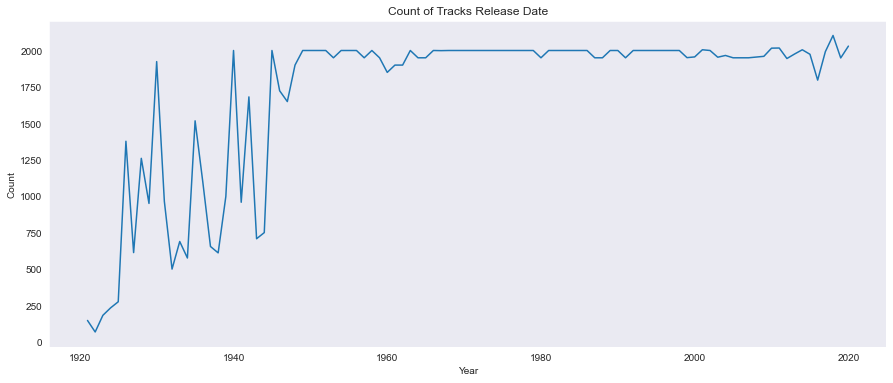

In [15]:
plt.figure(figsize=(15,6))
sns.set_style('dark')
year_release_date = df.groupby('year')['release_date'].count()
az = sns.lineplot(year_release_date.index, year_release_date)
az.set_xlabel('Year')
az.set_ylabel('Count')
az.set_title('Count of Tracks Release Date')
plt.show();

Mostly 2000 songs are added for each year on spotify

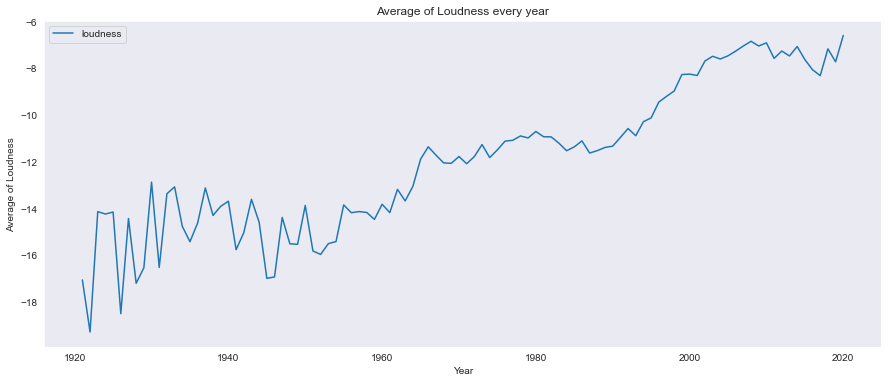

In [16]:
plt.figure(figsize=(15,6))
sns.set_style('dark')
loudness_year = df.groupby('year')['loudness'].mean()
ab = sns.lineplot(loudness_year.index, loudness_year, label='loudness')
ab.set_xlabel('Year')
ab.set_ylabel('Average of Loudness')
ab.set_title('Average of Loudness every year');

Tracks has become more loudness in recent year

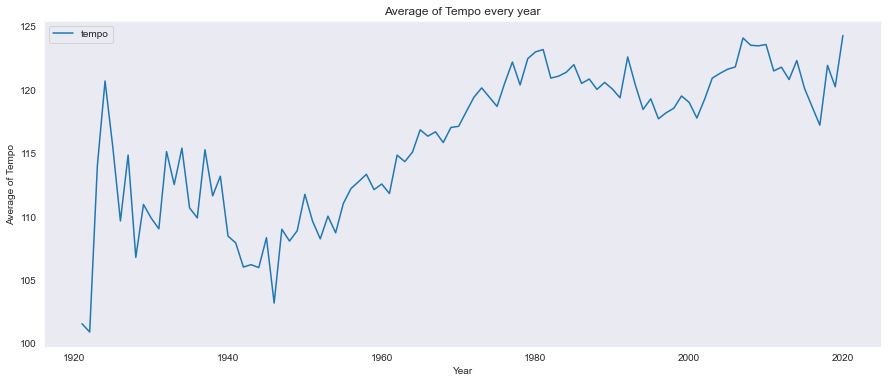

In [17]:
plt.figure(figsize=(15,6))
sns.set_style('dark')
tempo_year = df.groupby('year')['tempo'].mean()
ac = sns.lineplot(tempo_year.index, tempo_year, label='tempo')
ac.set_xlabel('Year')
ac.set_ylabel('Average of Tempo')
ac.set_title('Average of Tempo every year');

Tracks has become more tempo in recent year